Nama : Devano Abe

NIM : 2141720204

Absen : 08



# Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan.
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    * Merubah color space
    * Reduksi dimensi
    * dsb

5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

Open Challange (Opsional)

* Bagaimana cara melakukan evaluasi pada hasil segementasi?
* Terapkan pada kasus ini!

**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

# Langkah Pengerjaan

1. menampilkan tinggi, lebar, dan jumlah kanal gambar
2. normalisasi pada gambar untuk mengubah rentang nilai piksel menjadi antara 0 dan 1. dengan cara :
    * data diubah bentuknya (reshape) menjadi (h * w, ch), h = tinggi, w = lebar, dan ch = jumlah kanal gambar. Reshaping ini dilakukan untuk mengubah array gambar menjadi bentuk dua dimensi, di mana setiap baris mewakili piksel tunggal dalam gambar.
3. Membuat plot atau grafik yang menampilkan piksel-piksel dari data gambar dalam ruang warna RGB, dengan cara:
    * Sejumlah N piksel dipilih secara acak dari data gambar. Piksel-piksel tersebut disimpan dalam variabel colors, dan komponen warna merah (R), hijau (G), dan biru (B) dari piksel-piksel tersebut diambil dan disimpan dalam variabel terpisah (R, G, B).
   *  plot tersebut memperlihatkan hubungan antara intensitas warna merah dan hijau dalam piksel pada bagian pertama (subplot ax[0]), serta hubungan antara intensitas warna merah dan biru dalam piksel pada bagian kedua(subplot ax[1]).
4. Segmentasi citra menggunakan algoritma K-Means, dengan cara:
    * Citra diubah bentuknya menjadi array dua dimensi (2D) menggunakan metode reshape karena, algoritma K-Means membutuhkan citra dalam format array 2D dengan setiap baris mewakili piksel tunggal.
    * Jumlah klaster yang diinginkan ditentukan, dalam kasus ini adalah 2 klaster.
    * Objek K-Means dibuat dengan parameter n_clusters yang sesuai dengan jumlah klaster yang diinginkan.
    * Model K-Means dilatih pada data citra dengan menggunakan metode fit pada objek K-Means.
    * Label klaster yang diberikan oleh K-Means untuk setiap piksel dalam citra diarahkan kembali ke bentuk aslinya menggunakan metode reshape. Hasilnya adalah array yang memiliki dimensi yang sama dengan citra asli, tetapi setiap elemennya berisi label klaster yang sesuai.
    * Sebagai contoh, kita dapat mengubah klaster pertama (label 0) menjadi warna merah. Ini dilakukan dengan membuat salinan citra asli menggunakan img.copy(), dan kemudian   mengubah piksel-piksel dengan label klaster 0 menjadi [0, 0, 0] yang mewakili warna hitam.
    * Hasil segmentasi citra disimpan dalam variabel citra_segmentasi.

# Import Library

In [53]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab
import os

* Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
dataset_dir = '/content/drive/MyDrive/Machine Learning/img'
selected_images = [os.path.join(dataset_dir, file) for file in os.listdir(dataset_dir)]
five_plat = selected_images[:5]

* menampilkan 5 citra plat nomor dengan ukuran tertentu

In [56]:
def show_images(images, titles, figsize=(15, 7)):
    plt.figure(figsize=figsize)
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

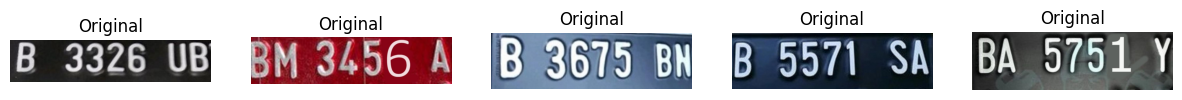

In [57]:
# Muat dan tampilkan citra-citra yang dipilih sebelum segmentasi
original_images = [cv2.imread(img) for img in five_plat]

# Menampilkan citra asli dengan judul "Original" (dalam format RGB)
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for ax, image in zip(axes, original_images):
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax.imshow(rgb_image)
    ax.set_title('Original')
    ax.axis('off')
plt.show()

# PLAT NOMOR 1

In [3]:
# Load Gambar
img = cv2.imread('/content/drive/MyDrive/Machine Learning/img/1.jpg')

* menampilkan tinggi, lebar, dan jumlah kanal gambar

In [4]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

343
1233
3


* normalisasi pada gambar

In [5]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(422919, 3)

* Plot ruang warna RGB

In [6]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)


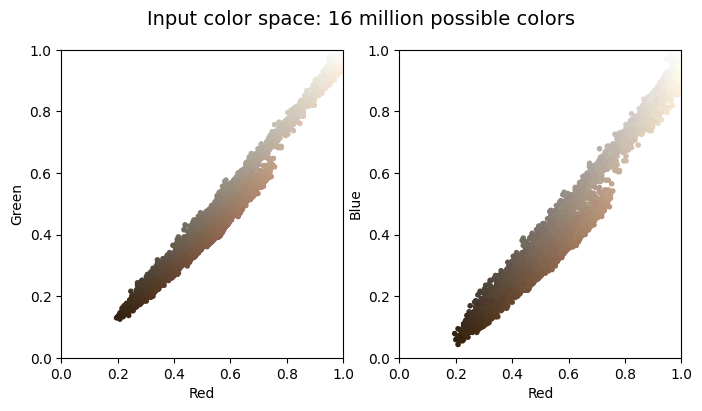

In [7]:
plot_pixels(data, title='Input color space: 16 million possible colors')

* Segmentasi citra menggunakan algoritma K-Means

In [8]:
from sklearn.cluster import KMeans

# Reshape citra menjadi array 2D (untuk K-Means)
citra_reshape = img.reshape((-1, 3))

# Tentukan jumlah klaster yang diinginkan
jumlah_klaster = 2

kmeans = KMeans(n_clusters=jumlah_klaster)
kmeans.fit(citra_reshape)

# Arahkan label klaster kembali ke bentuk asli
label_klaster = kmeans.labels_.reshape(img.shape[:2])

# Misalnya, Anda dapat menunjukkan klaster pertama (0) sebagai warna merah
citra_segmentasi = img.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0]

# Citra yang telah di-segmentasi tersimpan dalam citra_segmentasi


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


* Hasil Segmentasi

Text(0.5, 1.0, '2-color Image')

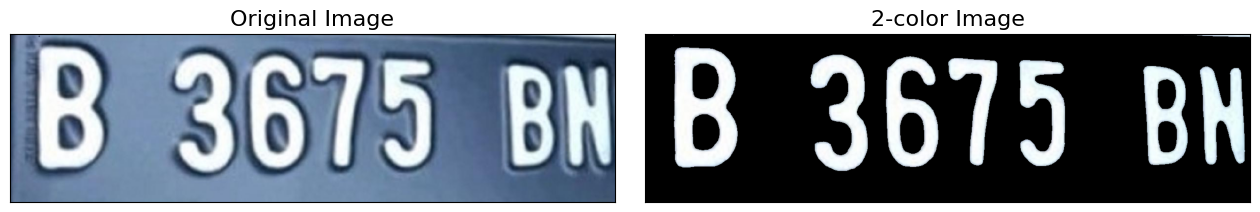

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

# PLAT NOMOR 2

In [10]:
# Load Gambar
img2 = cv2.imread('/content/drive/MyDrive/Machine Learning/img/2.jpg')

* menampilkan tinggi, lebar, dan jumlah kanal gambar

In [11]:
h, w, ch= img2.shape
print(h)
print(w)
print(ch)

258
1101
3


* normalisasi pada gambar

In [12]:
data = img2 / 255.0
data = data.reshape(h * w, ch)
data.shape

(284058, 3)

* Plot ruang warna RGB

In [13]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

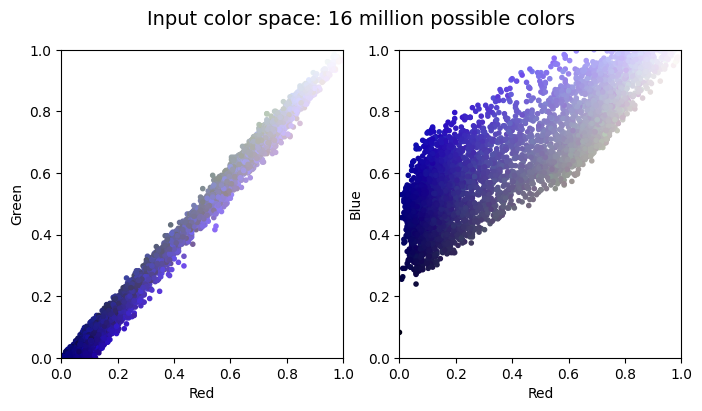

In [14]:
plot_pixels(data, title='Input color space: 16 million possible colors')

* Segmentasi citra menggunakan algoritma K-Means

In [15]:
from sklearn.cluster import KMeans

# Reshape citra menjadi array 2D (untuk K-Means)
citra_reshape = img2.reshape((-1, 3))

# Tentukan jumlah klaster yang diinginkan
jumlah_klaster = 2

kmeans = KMeans(n_clusters=jumlah_klaster)
kmeans.fit(citra_reshape)

# Arahkan label klaster kembali ke bentuk asli
label_klaster = kmeans.labels_.reshape(img2.shape[:2])

# Misalnya, Anda dapat menunjukkan klaster pertama (0) sebagai warna merah
citra_segmentasi = img2.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0]  # Ubah warna merah

# Citra yang telah di-segmentasi tersimpan dalam citra_segmentasi

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


* Hasil Segmentasi

Text(0.5, 1.0, '2-color Image')

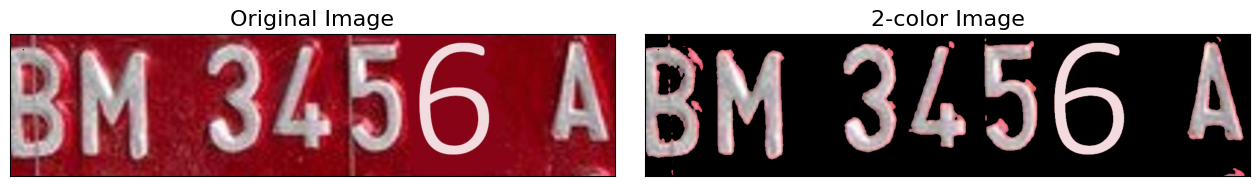

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

# PLAT NOMOR 3

In [17]:
# Load Gambar
img3 = cv2.imread('/content/drive/MyDrive/Machine Learning/img/3.jpg')

* menampilkan tinggi, lebar, dan jumlah kanal gambar

In [18]:
h, w, ch= img3.shape
print(h)
print(w)
print(ch)

359
1297
3


* normalisasi pada gambar

In [19]:
data = img3 / 255.0
data = data.reshape(h * w, ch)
data.shape

(465623, 3)

* Plot ruang warna RGB

In [20]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

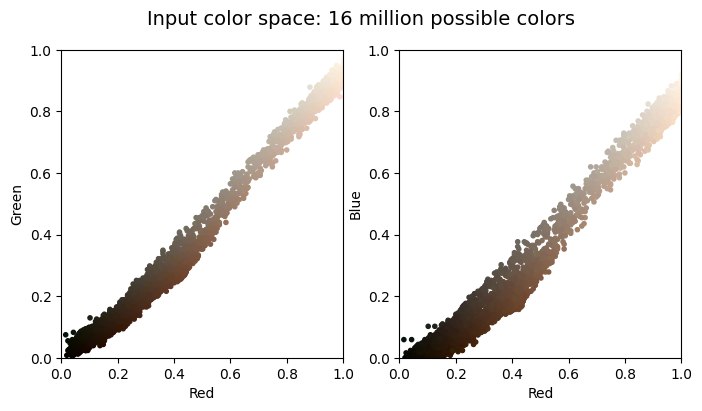

In [21]:
plot_pixels(data, title='Input color space: 16 million possible colors')

* Segmentasi citra menggunakan algoritma K-Means

In [22]:
from sklearn.cluster import KMeans

# Reshape citra menjadi array 2D (untuk K-Means)
citra_reshape = img3.reshape((-1, 3))

# Tentukan jumlah klaster yang diinginkan
jumlah_klaster = 2

kmeans = KMeans(n_clusters=jumlah_klaster)
kmeans.fit(citra_reshape)

# Arahkan label klaster kembali ke bentuk asli
label_klaster = kmeans.labels_.reshape(img3.shape[:2])

# Misalnya, Anda dapat menunjukkan klaster pertama (0) sebagai warna merah
citra_segmentasi = img3.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0]  # Ubah warna merah

# Citra yang telah di-segmentasi tersimpan dalam citra_segmentasi

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


* Hasil Segmentasi

Text(0.5, 1.0, '2-color Image')

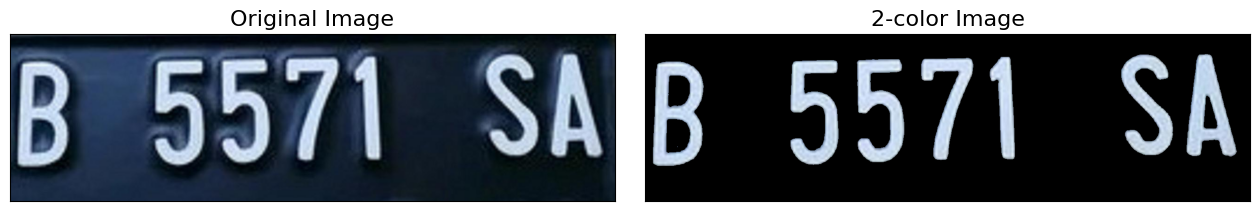

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

# PLAT NOMOR 4

In [36]:
# Load Gambar
img4 = cv2.imread('/content/drive/MyDrive/Machine Learning/img/4.jpg')

* menampilkan tinggi, lebar, dan jumlah kanal gambar

In [37]:
h, w, ch= img4.shape
print(h)
print(w)
print(ch)

343
1183
3


* normalisasi pada gambar

In [38]:
data = img4 / 255.0
data = data.reshape(h * w, ch)
data.shape

(405769, 3)

* Plot ruang warna RGB

In [39]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

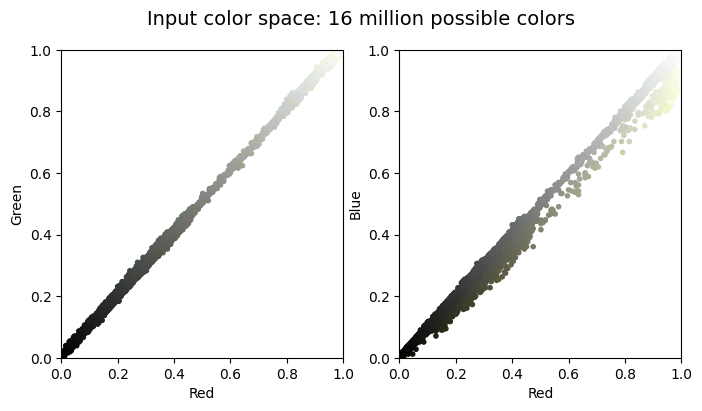

In [40]:
plot_pixels(data, title='Input color space: 16 million possible colors')

* Segmentasi citra menggunakan algoritma K-Means

In [41]:
from sklearn.cluster import KMeans

# Reshape citra menjadi array 2D (untuk K-Means)
citra_reshape = img4.reshape((-1, 3))

# Tentukan jumlah klaster yang diinginkan
jumlah_klaster = 2

kmeans = KMeans(n_clusters=jumlah_klaster)
kmeans.fit(citra_reshape)

# Arahkan label klaster kembali ke bentuk asli
label_klaster = kmeans.labels_.reshape(img4.shape[:2])

# Misalnya, Anda dapat menunjukkan klaster pertama (0) sebagai warna merah
citra_segmentasi = img4.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0]  # Ubah warna merah

# Citra yang telah di-segmentasi tersimpan dalam citra_segmentasi

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


* Hasil Segmentasi

Text(0.5, 1.0, '2-color Image')

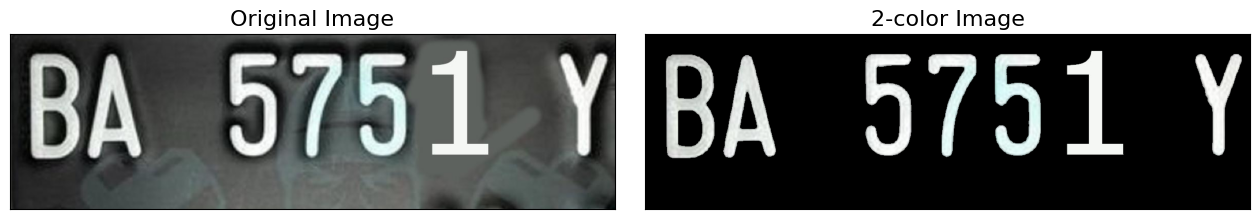

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

# PLAT NOMOR 5

In [44]:
# Load Gambar
img5 = cv2.imread('/content/drive/MyDrive/Machine Learning/img/5.jpg')

* menampilkan tinggi, lebar, dan jumlah kanal gambar

In [45]:
h, w, ch= img5.shape
print(h)
print(w)
print(ch)

161
778
3


* normalisasi pada gambar

In [46]:
data = img5 / 255.0
data = data.reshape(h * w, ch)
data.shape

(125258, 3)

* Plot ruang warna RGB

In [47]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

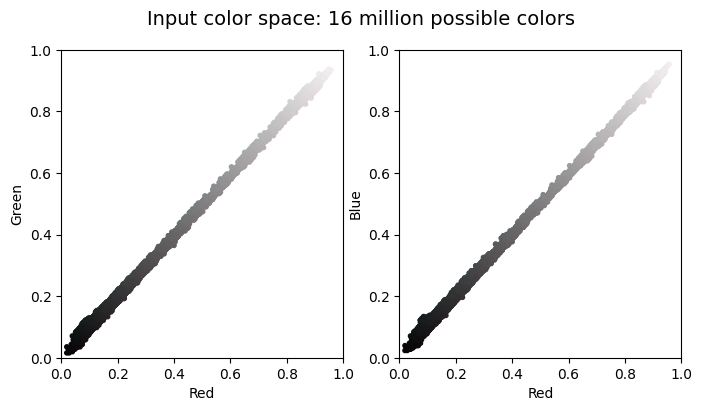

In [48]:
plot_pixels(data, title='Input color space: 16 million possible colors')

* Segmentasi citra menggunakan algoritma K-Means

In [51]:
from sklearn.cluster import KMeans

# Reshape citra menjadi array 2D (untuk K-Means)
citra_reshape = img5.reshape((-1, 3))

# Tentukan jumlah klaster yang diinginkan
jumlah_klaster = 2

kmeans = KMeans(n_clusters=jumlah_klaster)
kmeans.fit(citra_reshape)

# Arahkan label klaster kembali ke bentuk asli
label_klaster = kmeans.labels_.reshape(img5.shape[:2])

# Misalnya, Anda dapat menunjukkan klaster pertama (0) sebagai warna merah
citra_segmentasi = img5.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0]  # Ubah warna merah

# Citra yang telah di-segmentasi tersimpan dalam citra_segmentasi

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


* Hasil Segmentasi

Text(0.5, 1.0, '2-color Image')

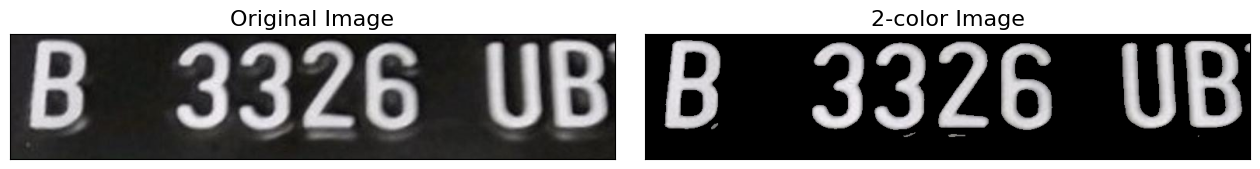

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)